In [1]:
import numpy as np
import matplotlib.pyplot as plt
from molass.Local import get_local_settings
local_settings = get_local_settings()
TUTORIAL_DATA = local_settings['TUTORIAL_DATA']
AhRR_DATA = local_settings.get('AhRR_DATA')     # None if not available

# Data Trimming
## Study Points
* Moment
* ssd.get_flowchange_points()
* ssd.get_usable_wrange()
* ssd.get_usable_qrange()
* ssd.get_trimming_info()
* ssd.copy()

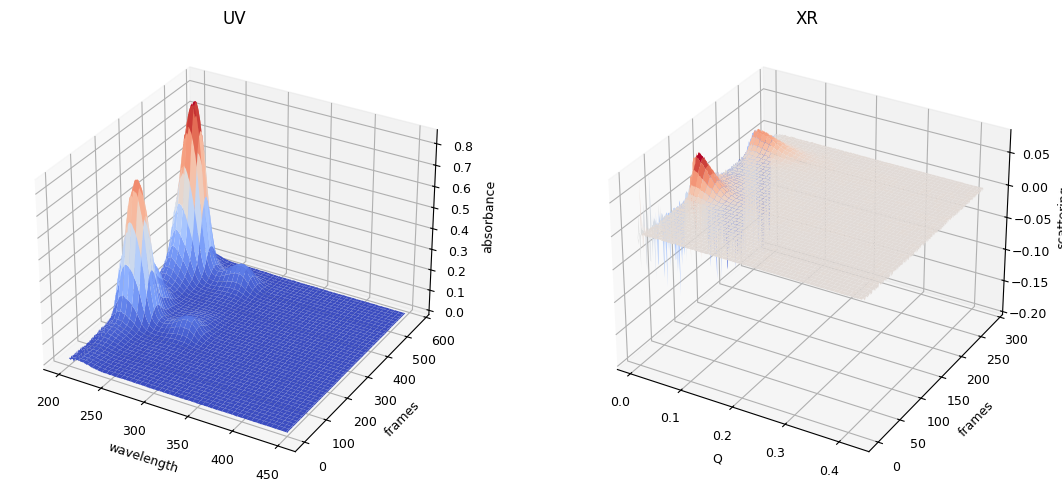

In [2]:
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(TUTORIAL_DATA)
ssd.plot_3d();

## Trimming in Elution Axis
### Trimming by Moment

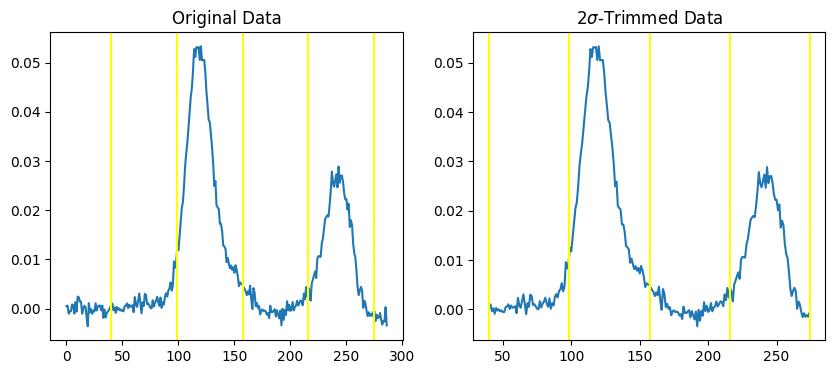

In [3]:
from molass.Stats import Moment
xr_icurve = ssd.xr.get_icurve()
uv_icurve = ssd.uv.get_icurve()
x = xr_icurve.x
y = xr_icurve.y
mt = Moment(x, y)
mean, std = mt.get_meanstd()
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.set_title("Original Data")
ax2.set_title(r"2$\sigma$-Trimmed Data")
ax1.plot(x, y)
wanted_range = np.logical_and(mean-2*std < x, x < mean+2*std)
ax2.plot(x[wanted_range], y[wanted_range])
for p in [mean-2*std, mean-std, mean, mean+std, mean+2*std]:
    for ax in ax1, ax2:
        ax.axvline(p, color='yellow')

In [4]:
mt.get_nsigma_points(2)

(40, 274)

### Trimming by Flow Change
* used only for data measured with flow rate changes

In [5]:
points = ssd.uv.get_flowchange_points()
points

((None, None), None)

In [6]:
def plot_flowchange_trimming(ax, in_folder):
    ssd = SSD(in_folder, uv_only=True)
    points, judge_info, (c1, c2) = ssd.uv.get_flowchange_points(return_also_curves=True)
    ax.set_title(in_folder)
    ax.plot(c1.x, c1.y)
    for k in points:
        if k is not None:
            ax.axvline(c1.x[k], color='cyan')

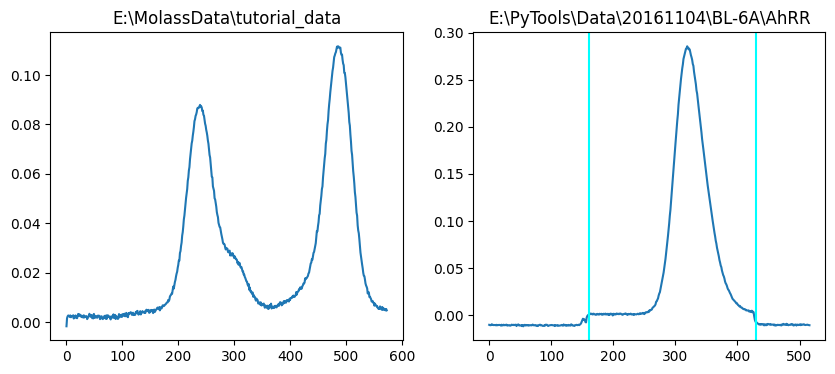

In [7]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))
plot_flowchange_trimming(ax1, TUTORIAL_DATA)
if AhRR_DATA is not None:
    plot_flowchange_trimming(ax2, AhRR_DATA)

## Trimming in Spectral Axis

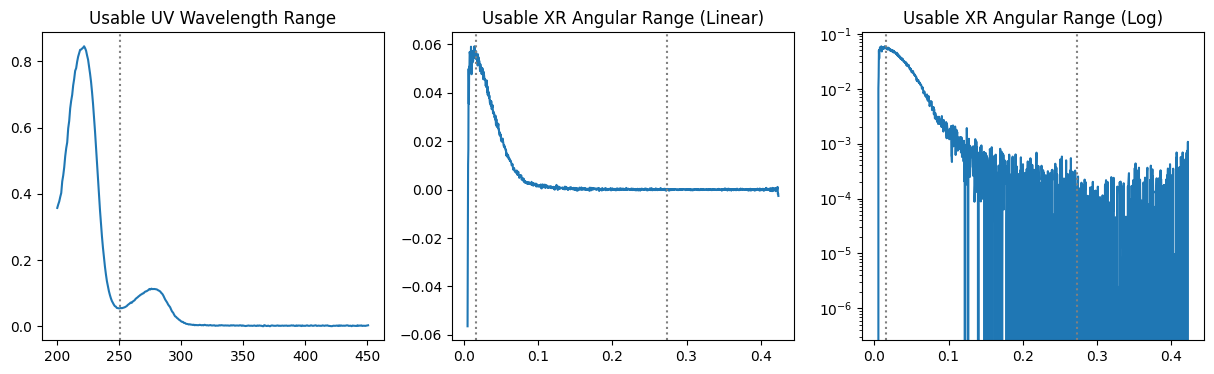

In [8]:
# ssd from sample_data
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,4))

ax1.set_title("Usable UV Wavelength Range")
i, j = ssd.uv.get_usable_wrange()
k = np.argmax(uv_icurve.y)
uv_jcurve = ssd.uv.get_jcurve(j=k)
ax1.plot(uv_jcurve.x, uv_jcurve.y)
for n in i, j:
    if n is not None:
        ax1.axvline(uv_jcurve.x[n], ls=":", color='gray')

ax2.set_title("Usable XR Angular Range (Linear)")
ax3.set_title("Usable XR Angular Range (Log)")
ax3.set_yscale('log')
i, j = ssd.xr.get_usable_qrange()
k = np.argmax(xr_icurve.y)
xr_jcurve = ssd.xr.get_jcurve(j=k)
for ax in ax2,ax3:
    ax.plot(xr_jcurve.x, xr_jcurve.y)
    for n in i, j:
        if n is not None:
            ax.axvline(xr_jcurve.x[n], ls=":", color='gray')

## Trimming Utility

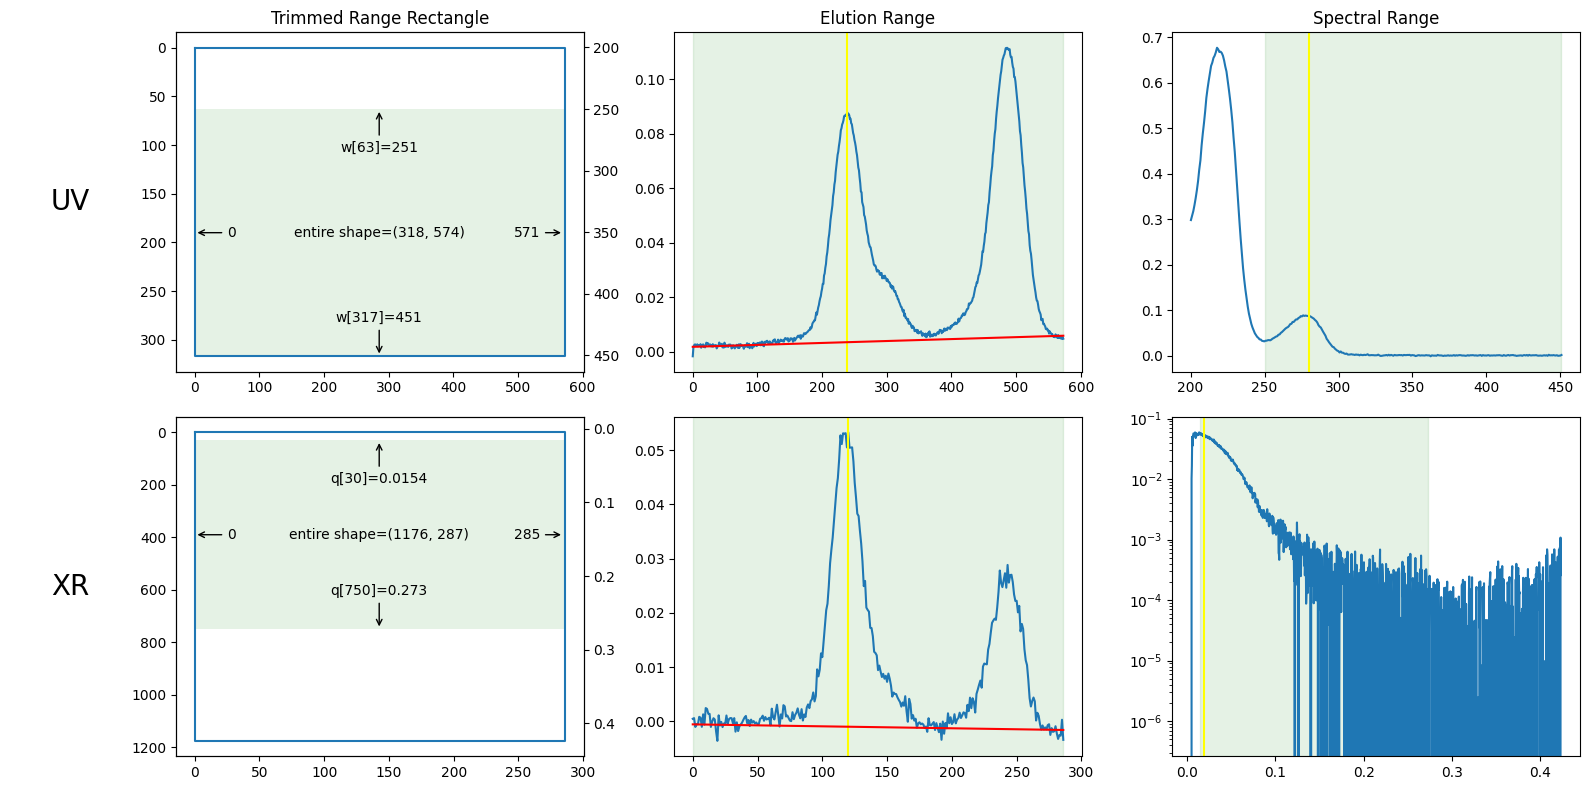

In [9]:
from molass.Global.Options import set_molass_options
set_molass_options(flowchange=True)
tinfo = ssd.make_trimming_info()
ssd.plot_trimming_info(tinfo)

## Trimmed Copy
* making deep copies

In [10]:
entire_ssd = ssd.copy()

In [11]:
trimmed_ssd = ssd.copy(xr_slices=tinfo.xr_slices, uv_slices=tinfo.uv_slices)